In [1]:
using CSV, DataFrames, CairoMakie, wgregseq, Dates

wgregseq.plotting_style.default_makie!()

In [10]:
Date("06/05/2007", dateformat"m/d/y")

2007-06-05

In [11]:
date_to_number(d::Date) = float(Dates.value(d) - Dates.value(Date(1970, 1, 1)))
date_to_number(d::AbstractString) = date_to_number(Date(d, dateformat"m/d/y"))
number_to_date(x::Real) = Date(unix2datetime(x * 24 * 3600))

struct LinearDateTicks
    n::Int
end

function MakieLayout.get_ticks(ticks::LinearDateTicks, ::typeof(identity), ::Makie.Automatic, vmin, vmax)
    mindate = number_to_date(vmin)
    maxdate = number_to_date(vmax)
    step = (maxdate - mindate) ÷ ticks.n
    @assert step >= Day(1)
    tickdates = collect(range(mindate, maxdate; step=step))
    tickvalues = date_to_number.(tickdates)
    ticklabels = string.(tickdates)
    return tickvalues, ticklabels
end

In [3]:
df = CSV.read("../../data/misc/sra_stat.csv", DataFrame)

Row,date,bases,open_access_bases,bytes,open_access_bytes
,String15,Int64,Int64,Int64,Int64
1,06/05/2007,20304190150,20304190150,50496285115,50496285115
2,04/04/2008,39591836573,39591836573,98175829054,98175829054
3,04/05/2008,41196134195,41196134195,102158063571,102158063571
4,04/09/2008,41645296177,41645296177,103295608811,103295608811
5,04/15/2008,41771058665,41771058665,103601716949,103601716949
6,04/17/2008,57166980893,57166980893,136281532630,136281532630
7,04/18/2008,59666402505,59666402505,142020536150,142020536150
8,04/19/2008,59832989101,59832989101,142367865452,142367865452
9,04/21/2008,61634022162,61634022162,146270545189,146270545189


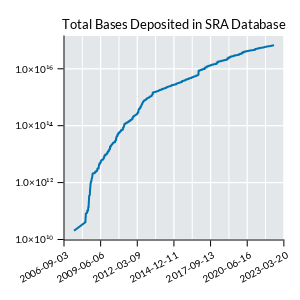

In [30]:
fig = Figure(resolution=(300, 300))

ax = Axis(
    fig[1, 1], 
    xticks=LinearDateTicks(6),
    xticklabelrotation=0.5, 
    yscale=log10, 
    yticks=10 .^ collect(10:2:16), 
    yminorgridvisible=false,
    xlabelfont = "Lato",
    ylabelfont = "Lato",
    xticklabelfont = "Lato",
    yticklabelfont = "Lato",
    titlefont = "Lato",
    title = "Total Bases Deposited in SRA Database"
    )

lines!(ax, date_to_number.(df.date), df.bases, linewidth=2)
save("total_bases_SRA.pdf", fig)
fig